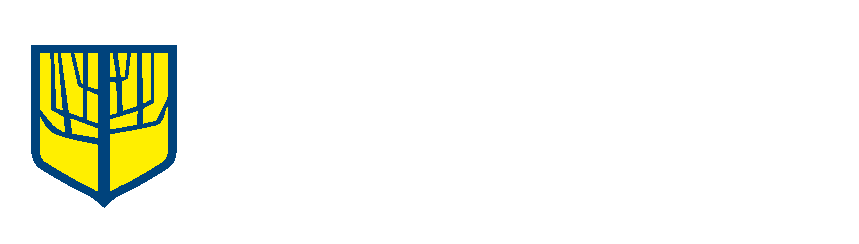

**Universidad Sergio Arboleda**

*Programa Ciencias de la Computación e Inteligencia Artificial*

*Autor: Esteban Rodriguez - Daniel Velásquez*

*Fecha: Mayo 2023*

*Tópico: Parcial 3*

*Materia: Aprendizaje de Máquina*


#Bibliotecas

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import numpy as np
import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import r2_score

#PARTE 1

Usar la red pre-entrenada VGG16 para clasificar imágenes

##Red

In [ ]:
model = VGG16()

553467096/553467096 [==============================] - 6s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/2/24/Guitar_1.jpg

--2023-05-25 04:26:48--  https://upload.wikimedia.org/wikipedia/commons/2/24/Guitar_1.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292923 (286K) [image/jpeg]
Saving to: ‘Guitar_1.jpg’

Guitar_1.jpg        100%[===================>] 286.06K  1.85MB/s    in 0.2s    

2023-05-25 04:26:48 (1.85 MB/s) - ‘Guitar_1.jpg’ saved [292923/292923]



In [ ]:
imgGuitar = keras.utils.image_utils.load_img("/content/Guitar_1.jpg",
                                       target_size=(224, 224),
                                       keep_aspect_ratio=True)

In [ ]:
imgGuitar2 = keras.utils.img_to_array(imgGuitar)

In [ ]:
imgGuitar3 = imgGuitar2.reshape(1, 224, 224, 3)

In [ ]:
imgGuitar4 = preprocess_input(imgGuitar3)

In [ ]:
preprocess_input(imgGuitar3).min()

-242.36

In [ ]:
np.argmax(model.predict(imgGuitar4))

1/1 [==============================] - 4s 4s/step


402

In [ ]:
np.max(model.predict(imgGuitar4))

1/1 [==============================] - 0s 24ms/step


0.9981402

In [ ]:
decode_predictions(model.predict(imgGuitar4), top=5)

35363/35363 [==============================] - 0s 0us/step


[[('n02676566', 'acoustic_guitar', 0.9981402),
  ('n03272010', 'electric_guitar', 0.00087670254),
  ('n02787622', 'banjo', 0.00086909224),
  ('n03929660', 'pick', 8.6517364e-05),
  ('n04536866', 'violin', 1.5314203e-05)]]

In [ ]:
layer_1 = model.layers[1]

In [ ]:
layer_1.weights[0][0][:, :, 0].shape

TensorShape([3, 3])

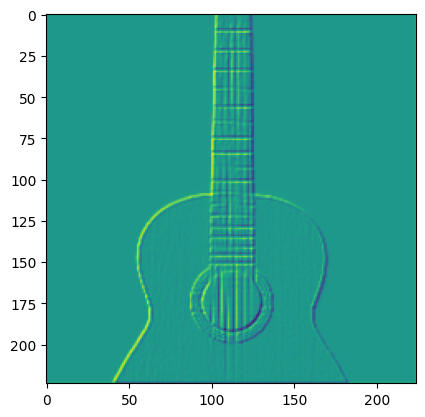

In [ ]:
plt.imshow(layer_1.convolution_op(inputs=imgGuitar3, kernel=layer_1.get_weights()[0])[0][:, :, 0])

##a) Cargar 3 imágenes y utilizar la red para clasificarlas. (determinar probabilidades)

###Imagen 1

####Procesamiento

In [ ]:
!wget https://media.revistagq.com/photos/5ca5e602944b834654eb8fe6/16:9/pass/los_10_coches_mas_caros_del_mundo_131086603.jpg

--2023-05-25 04:26:53--  https://media.revistagq.com/photos/5ca5e602944b834654eb8fe6/16:9/pass/los_10_coches_mas_caros_del_mundo_131086603.jpg
Resolving media.revistagq.com (media.revistagq.com)... 151.101.2.133, 151.101.66.133, 151.101.130.133, ...
Connecting to media.revistagq.com (media.revistagq.com)|151.101.2.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73163 (71K) [image/jpeg]
Saving to: ‘los_10_coches_mas_caros_del_mundo_131086603.jpg’

los_10_coches_mas_c 100%[===================>]  71.45K  --.-KB/s    in 0.01s   

2023-05-25 04:26:53 (5.65 MB/s) - ‘los_10_coches_mas_caros_del_mundo_131086603.jpg’ saved [73163/73163]



In [ ]:
img = keras.utils.image_utils.load_img("/content/los_10_coches_mas_caros_del_mundo_131086603.jpg",
                                       target_size=(224, 224),
                                       keep_aspect_ratio=True)

In [ ]:
img2 = keras.utils.img_to_array(img)

In [ ]:
img3 = img2.reshape(1, 224, 224, 3)

In [ ]:
img4 = preprocess_input(img3)

In [ ]:
preprocess_input(img3).min()

-247.36

In [ ]:
np.argmax(model.predict(img4))

1/1 [==============================] - 0s 30ms/step


817

In [ ]:
np.max(model.predict(img4))

1/1 [==============================] - 0s 26ms/step


0.9546525

In [ ]:
predictions1 = decode_predictions(model.predict(img4), top=5)
predictions1

1/1 [==============================] - 0s 25ms/step


[[('n04285008', 'sports_car', 0.9546525),
  ('n04037443', 'racer', 0.037049867),
  ('n02974003', 'car_wheel', 0.007899725),
  ('n02930766', 'cab', 0.00021687367),
  ('n02814533', 'beach_wagon', 7.920523e-05)]]

In [ ]:
layer_1 = model.layers[1]

In [ ]:
layer_1.weights[0][0][:, :, 0].shape

TensorShape([3, 3])

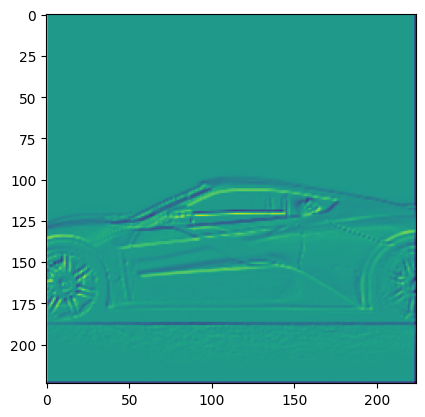

In [ ]:
plt.imshow(layer_1.convolution_op(inputs=img3, kernel=layer_1.get_weights()[0])[0][:, :, 0])

####Predicciones

In [ ]:
x=[]
y=[]
for i in predictions1[0]:
  x.append(i[1])
  y.append(round(i[2]*100,2))

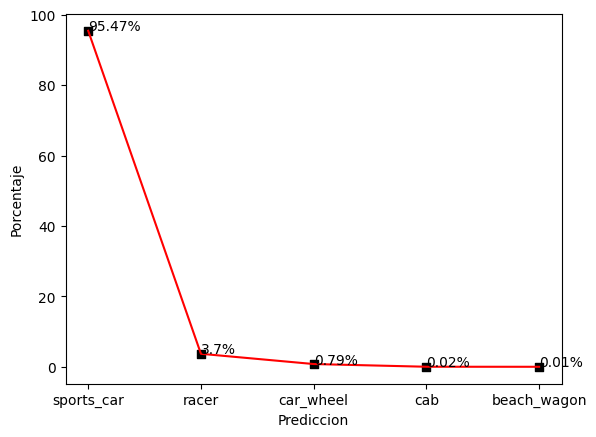

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y, color = "r")
for i in range(len(x)):
  ax.scatter(x[i], y[i], color = "black", marker = 's')
  plt.annotate((str(y[i])+"%"), (x[i], y[i]))

plt.xlabel("Prediccion")
plt.ylabel("Porcentaje")

plt.show()

###Imagen 2

####Procesamiento

In [ ]:
!wget https://cdn.britannica.com/35/238335-050-2CB2EB8A/Lionel-Messi-Argentina-Netherlands-World-Cup-Qatar-2022.jpg

--2023-05-25 04:26:54--  https://cdn.britannica.com/35/238335-050-2CB2EB8A/Lionel-Messi-Argentina-Netherlands-World-Cup-Qatar-2022.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 18.172.122.6, 18.172.122.27, 18.172.122.62, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|18.172.122.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230010 (225K) [image/jpeg]
Saving to: ‘Lionel-Messi-Argentina-Netherlands-World-Cup-Qatar-2022.jpg’

Lionel-Messi-Argent 100%[===================>] 224.62K  --.-KB/s    in 0.03s   

2023-05-25 04:26:54 (6.78 MB/s) - ‘Lionel-Messi-Argentina-Netherlands-World-Cup-Qatar-2022.jpg’ saved [230010/230010]



In [ ]:
img = keras.utils.image_utils.load_img("/content/Lionel-Messi-Argentina-Netherlands-World-Cup-Qatar-2022.jpg",
                                       target_size=(224, 224),
                                       keep_aspect_ratio=True)

In [ ]:
img2 = keras.utils.img_to_array(img)

In [ ]:
img3 = img2.reshape(1, 224, 224, 3)

In [ ]:
img4 = preprocess_input(img3)

In [ ]:
preprocess_input(img3).min()

-247.36

In [ ]:
np.argmax(model.predict(img4))

1/1 [==============================] - 0s 26ms/step


805

In [ ]:
np.max(model.predict(img4))

1/1 [==============================] - 0s 24ms/step


0.9667204

In [ ]:
predictions2 = decode_predictions(model.predict(img4), top=5)
predictions2

1/1 [==============================] - 0s 25ms/step


[[('n04254680', 'soccer_ball', 0.9667204),
  ('n02799071', 'baseball', 0.020729452),
  ('n09835506', 'ballplayer', 0.010890721),
  ('n04118538', 'rugby_ball', 0.0013062155),
  ('n03379051', 'football_helmet', 0.00034472186)]]

In [ ]:
layer_1 = model.layers[1]

In [ ]:
layer_1.weights[0][0][:, :, 0].shape

TensorShape([3, 3])

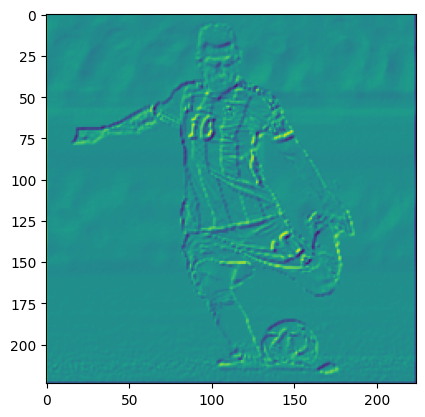

In [ ]:
plt.imshow(layer_1.convolution_op(inputs=img3, kernel=layer_1.get_weights()[0])[0][:, :, 0])

####Predicciones

In [ ]:
x=[]
y=[]
for i in predictions2[0]:
  x.append(i[1])
  y.append(round(i[2]*100,2))

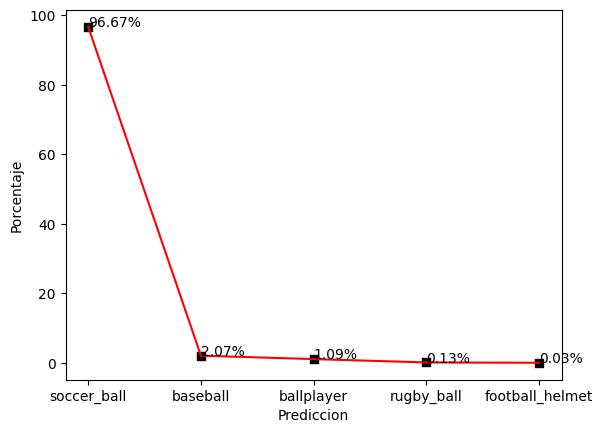

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y, color = "r")
for i in range(len(x)):
  ax.scatter(x[i], y[i], color = "black", marker = 's')
  plt.annotate((str(y[i])+"%"), (x[i], y[i]))

plt.xlabel("Prediccion")
plt.ylabel("Porcentaje")

plt.show()

###Imagen 3

####Procesamiento

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/b/bd/Taj_Mahal%2C_Agra%2C_India_edit3.jpg

--2023-05-25 04:26:55--  https://upload.wikimedia.org/wikipedia/commons/b/bd/Taj_Mahal%2C_Agra%2C_India_edit3.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2444309 (2.3M) [image/jpeg]
Saving to: ‘Taj_Mahal,_Agra,_India_edit3.jpg’

Taj_Mahal,_Agra,_In 100%[===================>]   2.33M  8.26MB/s    in 0.3s    

2023-05-25 04:26:56 (8.26 MB/s) - ‘Taj_Mahal,_Agra,_India_edit3.jpg’ saved [2444309/2444309]



In [ ]:
img = keras.utils.image_utils.load_img("/content/Taj_Mahal,_Agra,_India_edit3.jpg",
                                       target_size=(224, 224),
                                       keep_aspect_ratio=True)

In [ ]:
img2 = keras.utils.img_to_array(img)

In [ ]:
img3 = img2.reshape(1, 224, 224, 3)

In [ ]:
img4 = preprocess_input(img3)

In [ ]:
preprocess_input(img3).min()

-247.36

In [ ]:
np.argmax(model.predict(img4))

1/1 [==============================] - 0s 23ms/step


668

In [ ]:
np.max(model.predict(img4))

1/1 [==============================] - 0s 23ms/step


0.70147854

In [ ]:
prediction3 = decode_predictions(model.predict(img4), top=5)
prediction3

1/1 [==============================] - 0s 23ms/step


[[('n03788195', 'mosque', 0.70147854),
  ('n03877845', 'palace', 0.12209764),
  ('n03220513', 'dome', 0.080924965),
  ('n03781244', 'monastery', 0.055767044),
  ('n03028079', 'church', 0.031934287)]]

In [ ]:
layer_1 = model.layers[1]

In [ ]:
layer_1.weights[0][0][:, :, 0].shape

TensorShape([3, 3])

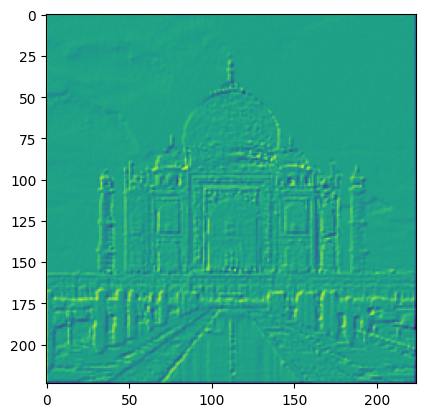

In [ ]:
plt.imshow(layer_1.convolution_op(inputs=img3, kernel=layer_1.get_weights()[0])[0][:, :, 0])

####Predicciones

In [ ]:
x=[]
y=[]
for i in prediction3[0]:
  x.append(i[1])
  y.append(round(i[2]*100,2))

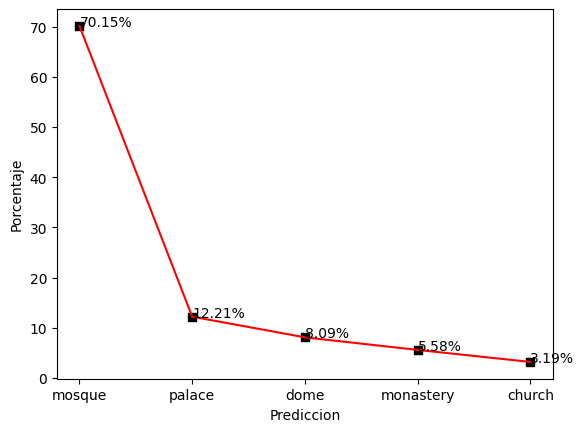

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y, color = "r")
for i in range(len(x)):
  ax.scatter(x[i], y[i], color = "black", marker = 's')
  plt.annotate((str(y[i])+"%"), (x[i], y[i]))

plt.xlabel("Prediccion")
plt.ylabel("Porcentaje")

plt.show()

##b) Visualizar la salida de la imagen de la guitarra para cada uno de los 64 filtros encontrados por la red en la primera capa.

In [ ]:
layer_1 = model.layers[1]

In [ ]:
layer_1.weights[0][0][:, :, 0].shape

TensorShape([3, 3])

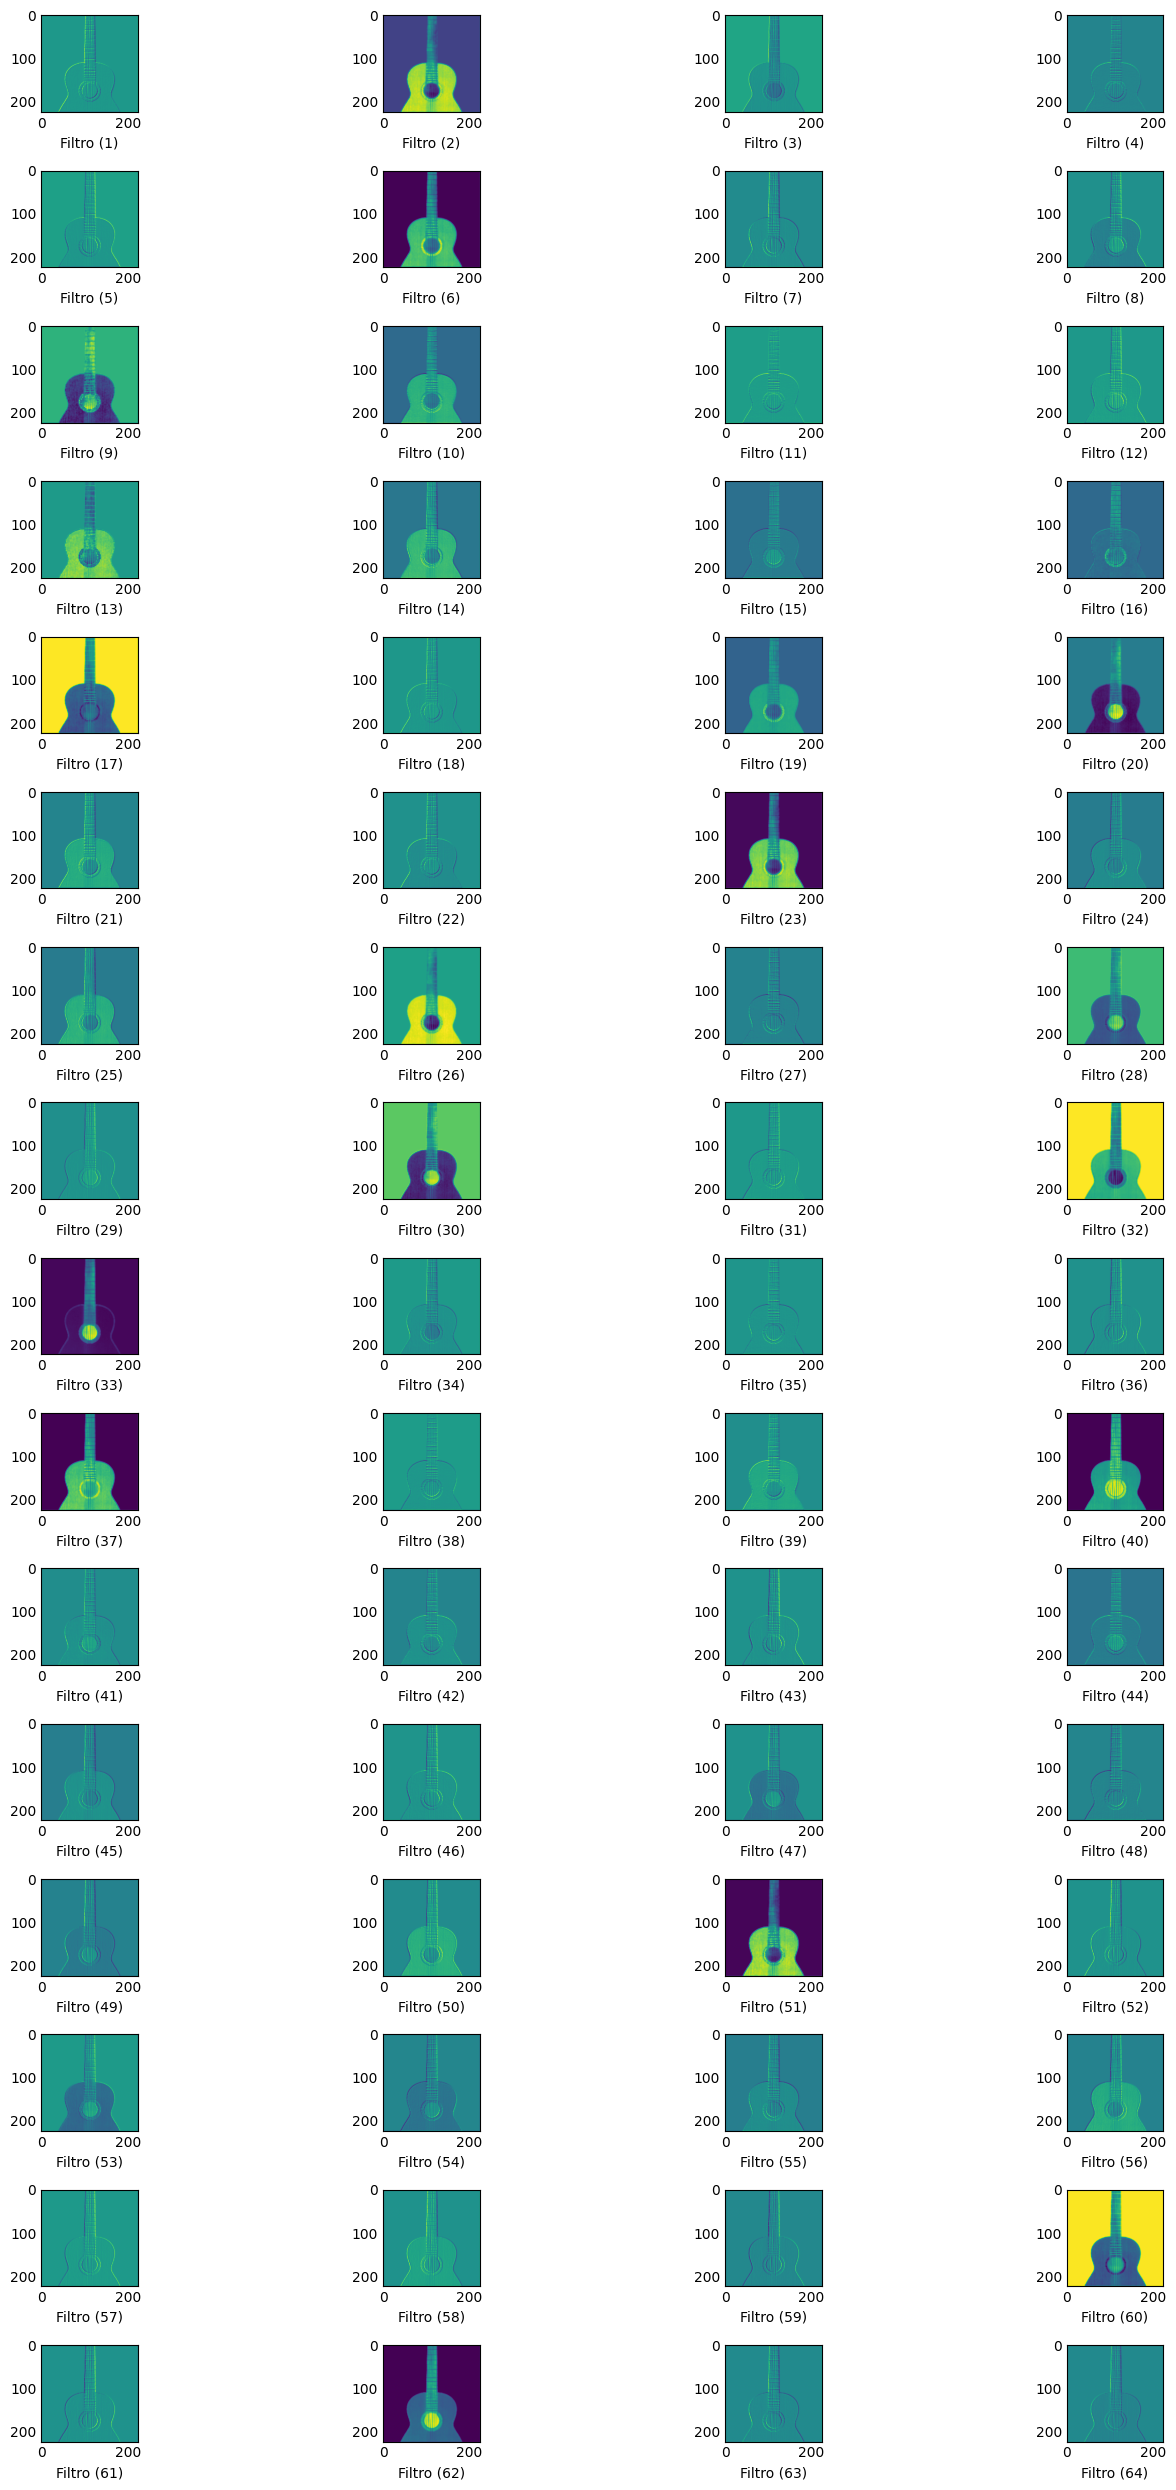

In [ ]:
# Ajusta el tamaño de la figura
fig, axes = plt.subplots(16, 4, figsize=(15, 25))

index = 0
for i in range(16):
    for j in range(4):
        # Ajusta el tamaño de cada eje
        axes[i][j].set_aspect('auto')  # Ajusta el aspecto del eje
        axes[i][j].tick_params(axis='both', which='both', length=0)  # Oculta los ticks en los ejes
        # axes[i][j].axis('off')
        # Agrega xlabel a cada eje
        axes[i][j].set_xlabel(f'Filtro ({index+1})')

        # Muestra la imagen en cada eje
        axes[i][j].imshow(layer_1.convolution_op(inputs=imgGuitar3, kernel=layer_1.get_weights()[0])[0][:, :, index])

        index += 1

plt.tight_layout()  # Ajusta automáticamente los espacios entre subplots
plt.show()

##c) Visualizar la salida de la imagen de la guitarra después de aplicar la segunda capa de convolución.

In [ ]:
# Obtener la salida de la segunda capa de convolución
layer_2_output = model.layers[2].output
layer_2_model = keras.models.Model(inputs=model.input, outputs=layer_2_output)
output = layer_2_model.predict(imgGuitar4)

1/1 [==============================] - 0s 211ms/step


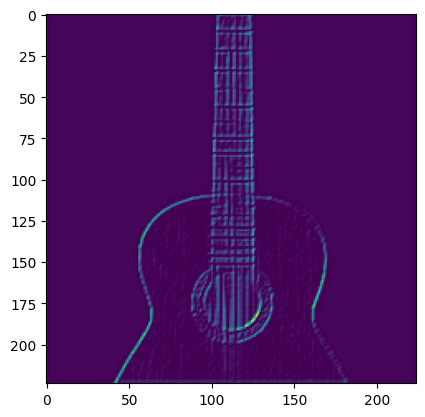

In [ ]:
# Visualizar la salida
#plt.imshow(output[0, :, :, 0], cmap='gray')
plt.imshow(output[0, :, :, 0])  # Visualizar el primer canal de la salida

##d) Visualizar la salida de la imagen de la guitarra después de aplicar MaxPooling.

In [ ]:
# Obtener la salida de la primera capa de MaxPooling
maxpool_output = model.layers[3].output
#maxpool_output = model.layers[7].output
maxpool_model = keras.models.Model(inputs=model.input, outputs=maxpool_output)
output = maxpool_model.predict(imgGuitar4)

1/1 [==============================] - 0s 47ms/step


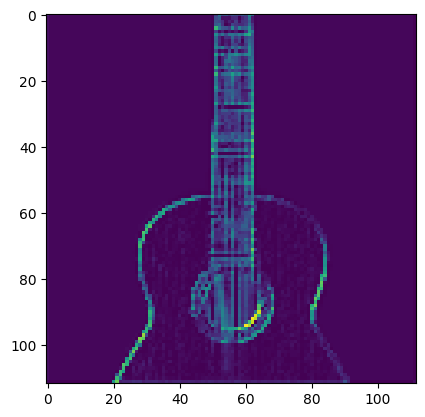

In [ ]:
# Visualizar la salida
plt.imshow(output[0, :, :, 0])  # Visualizar el primer canal de la salida

##e) Corroborar manualmente (con numpy) la salida de conv2d para el filtro 0 del punto b.

Filtro 0 Primera capa convolucion - modelo

In [ ]:
filter_output_model = layer_1.convolution_op(inputs=imgGuitar3, kernel=layer_1.get_weights()[0])[0][:, :, 0]


Filtro 0 Primera capa convolucion - manual

In [ ]:
# Obtener los pesos y los sesgos del filtro 0 de la primera capa de convolución
conv1_weights = model.layers[1].get_weights()[0]
conv1_biases = model.layers[1].get_weights()[1]

# Realizar la convolución manualmente
conv_output = np.zeros((1, 222, 222, 64))
for c in range(64):
    for h in range(222):
        for w in range(222):
            conv_output[0, h, w, c] = np.sum(imgGuitar3[0, h:h+3, w:w+3, :] * conv1_weights[:, :, :, c]) + conv1_biases[c]

# Comparar la salida manual y la salida del modelo
filter_output_manual = conv_output[0, :, :, 0]

Comparacion de shape

In [ ]:
print("Shape primera capa de convolucion, filtro 0, modelo", filter_output_model.shape)
print("Shape primera capa de convolucion, filtro 0, manual", filter_output_manual.shape)

Shape primera capa de convolucion, filtro 0, modelo (224, 224)
Shape primera capa de convolucion, filtro 0, manual (222, 222)


Impresion de filtros

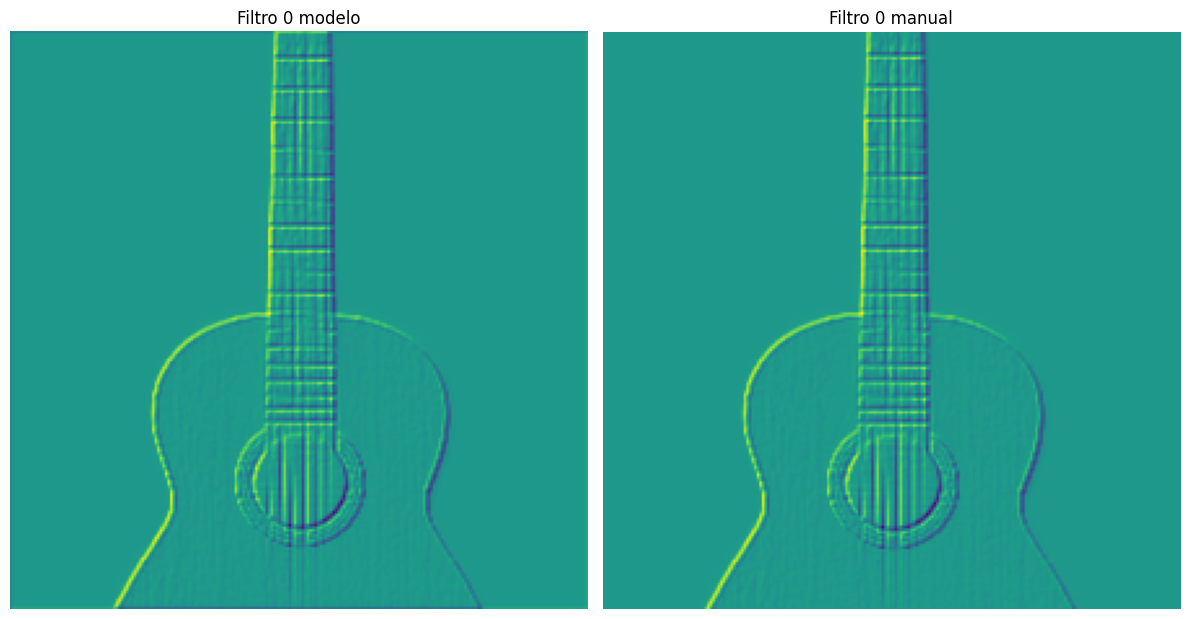

In [ ]:
# Ajusta el tamaño de la figura
fig, axes = plt.subplots(1, 2, figsize=(12, 25))

for i in range(2):
  # Ajusta el tamaño de cada eje
  axes[i].set_aspect('auto')  # Ajusta el aspecto del eje
  axes[i].tick_params(axis='both', which='both', length=0)  # Oculta los ticks en los ejes
  axes[i].axis('off')

axes[0].imshow(filter_output_model) #mostrar imagen 0
axes[0].set_title(f'Filtro 0 modelo')

axes[1].imshow(filter_output_manual) #mostrar imagen 1
axes[1].set_title(f'Filtro 0 manual')

plt.tight_layout()  # Ajusta automáticamente los espacios entre subplots
plt.show()

#PARTE 2

Desarrollar una red neuronal usando Keras para el dataset de la diabetes. 
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)

Utilizar 2 capas ocultas densas con función de activación Sigmoid.

In [ ]:
df_diabetes = load_diabetes()

In [ ]:
X = df_diabetes.data
y = df_diabetes.target

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
# Variables para almacenar la pérdida y el MSE
loss = []
mse = []
np.set_printoptions(precision=10, suppress=True)
# Entrenar el modelo y calcular la pérdida y el MSE
for epoch in range(100):
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)
    loss.append(history.history['loss'][0])
    
    # Calcular el MSE utilizando los valores predichos
    y_pred = model.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

5/5 [==============================] - 0s 2ms/step


##a) Realizar la gráfica de número de iteraciones vs loss y gráfica de número de iteraciones vs mse. Determinar el óptimo # de iteraciones


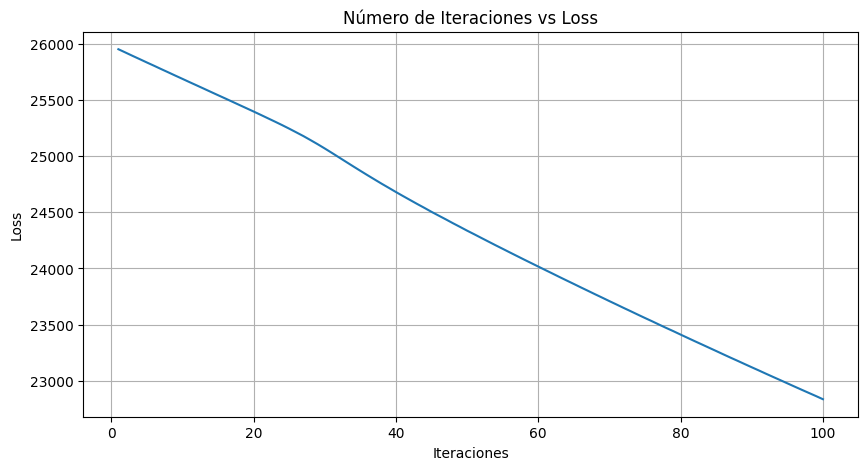

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss)+1), loss)
plt.title('Número de Iteraciones vs Loss')
plt.xlabel('Iteraciones')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

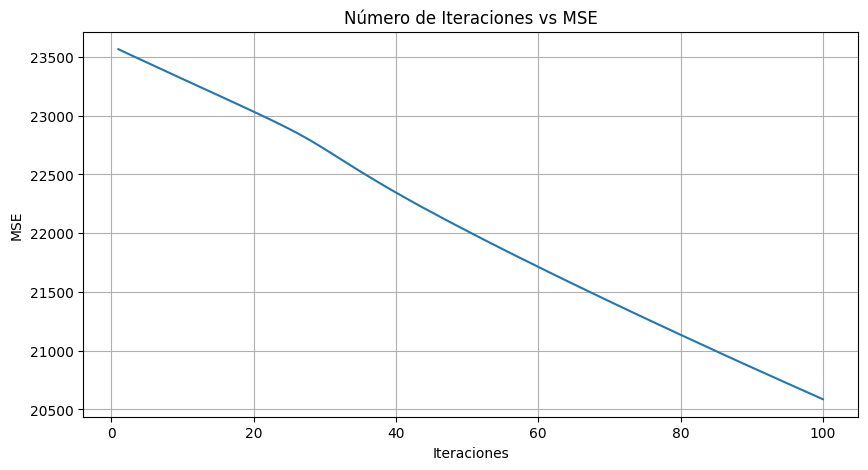

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(mse)+1), mse)
plt.title('Número de Iteraciones vs MSE')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


In [ ]:
# Calcular el MSE y R^2 en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print("MSE (entrenamiento):", mse_train)
print("Coeficiente R^2 (entrenamiento):", r2_train)

# Calcular el MSE y R^2 en el conjunto de prueba
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("MSE (prueba):", mse_test)
print("Coeficiente R^2 (prueba):", r2_test)


10/10 [==============================] - 0s 2ms/step
MSE (entrenamiento): 22820.15685326055
Coeficiente R^2 (entrenamiento): -2.711631551921625
5/5 [==============================] - 0s 2ms/step
MSE (prueba): 20586.698195342382
Coeficiente R^2 (prueba): -2.8135465970821834


##b) Calcular manualmente (desarrollar el propio código, hacerlo a mano o en Excel), la salida de la red para cualquiera  de los datos de entrada y corroborar los resultados obtenidos con Keras.

In [ ]:
input_data = X_test[0]

In [ ]:
predicted_output = model.predict(np.array([input_data]))
print("Salida de la red neuronal:")
print(predicted_output)

1/1 [==============================] - 0s 19ms/step
Salida de la red neuronal:
[[35.34647]]


In [ ]:
# Calcular manualmente la salida de la red para el mismo dato de entrada
weights = model.get_weights()
layer1_weights = weights[0]
layer1_biases = weights[1]
layer2_weights = weights[2]
layer2_biases = weights[3]
output_weights = weights[4]
output_biases = weights[5]


In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def neurona(x,w):
  return np.dot(x,w)


In [ ]:
#primera capa
layer1_output = sigmoid(neurona(input_data, layer1_weights) + layer1_biases )
#segunda capa
layer2_output = sigmoid(neurona(layer1_output, layer2_weights) +  layer2_biases )
#SALIDA
manual_output = neurona(layer2_output, output_weights) +  output_biases


In [ ]:
print("Salida calculada manualmente:")
print(manual_output)

Salida calculada manualmente:
[35.3464699802]
